In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [208]:
data=pd.read_csv('./data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [209]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [211]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Handling Date Column

In [212]:
data['date']=data['date'].str.split(' ',expand=True)[0]

In [213]:
data['date']=pd.to_datetime(data['date'])

In [214]:
data['HouseAge']=(data['date'].dt.year)-data['yr_built']
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,HouseAge
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,59
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,93
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,48
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,51
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,38


Exploratory Data Analysis

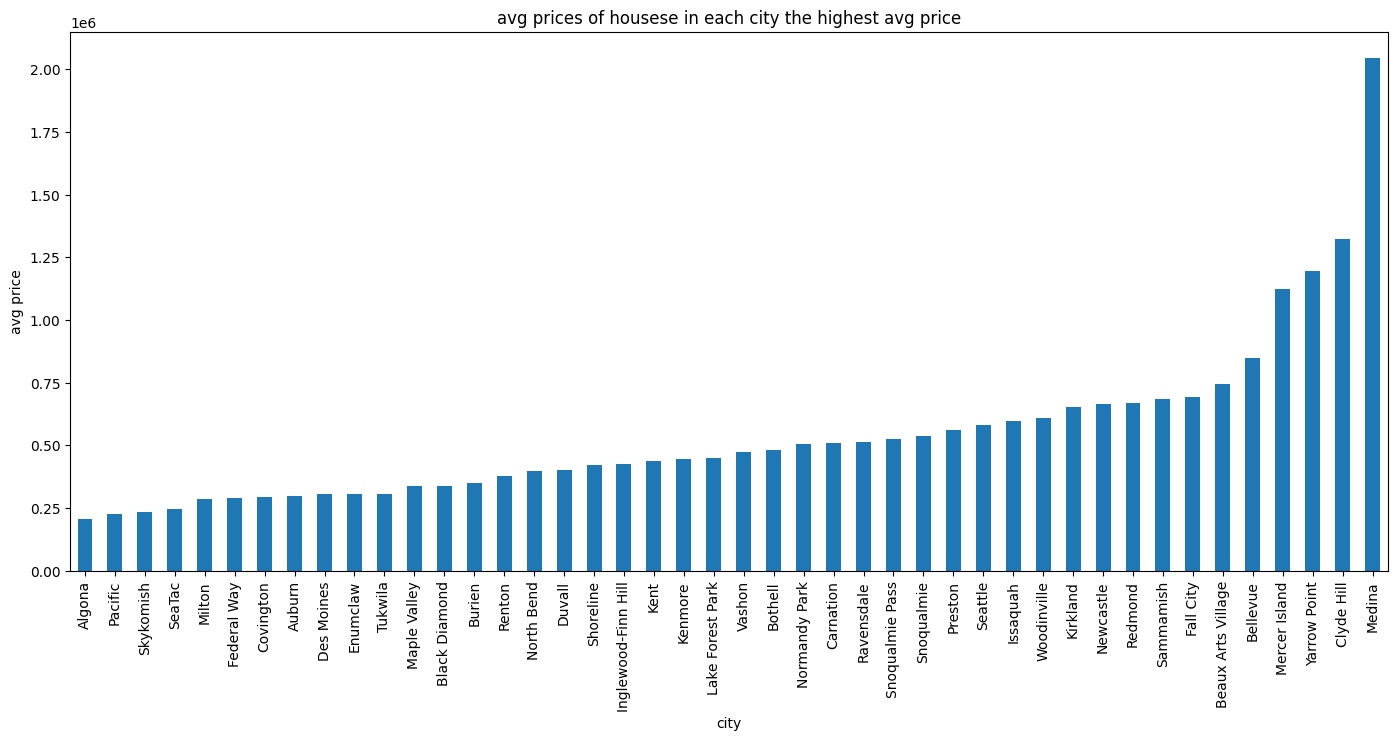

In [215]:
plt.figure(figsize=(17,7))
data.groupby('city')['price'].mean().sort_values().plot(kind="bar")
plt.xlabel("city")
plt.ylabel("avg price")
plt.title("avg prices of housese in each city the highest avg price");

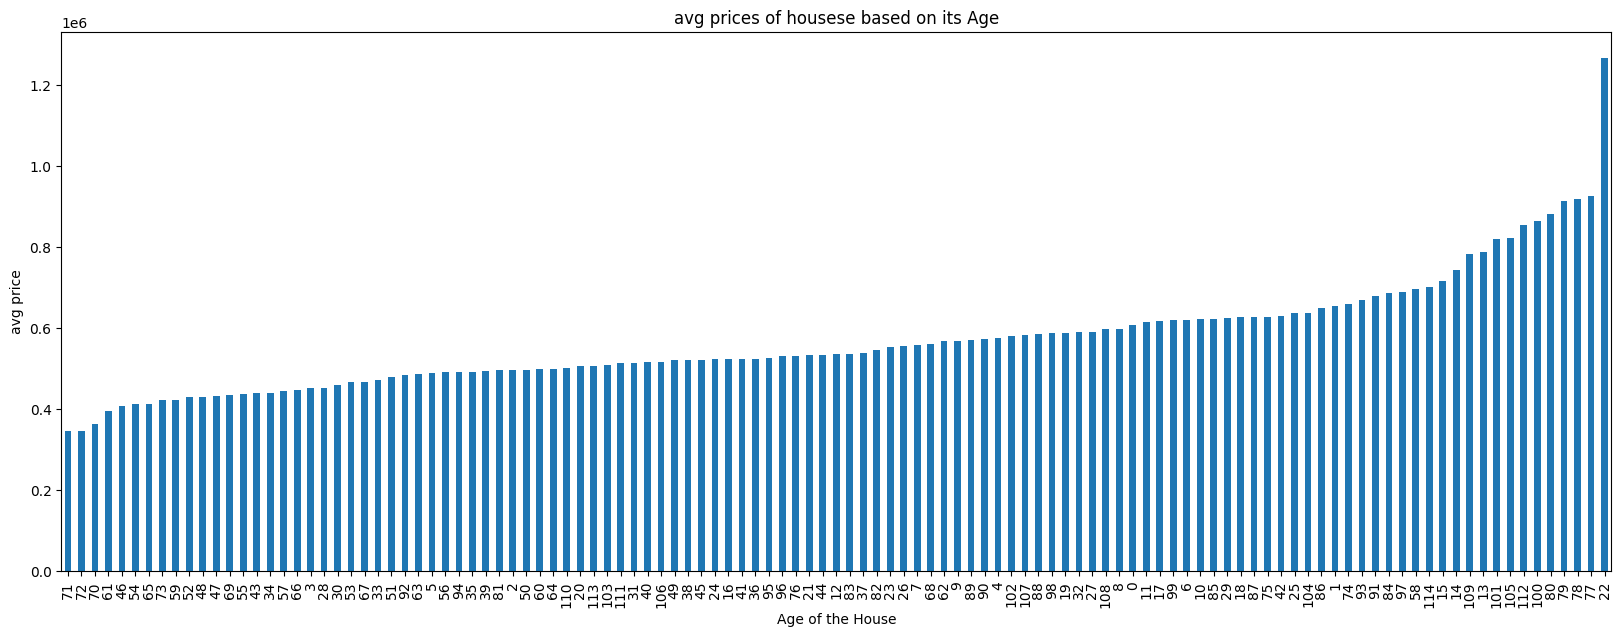

In [216]:
plt.figure(figsize=(20,7))
data.groupby(['HouseAge'])['price'].mean().sort_values().plot(kind="bar")
plt.xlabel("Age of the House")
plt.ylabel("avg price")
plt.title("avg prices of housese based on its Age");

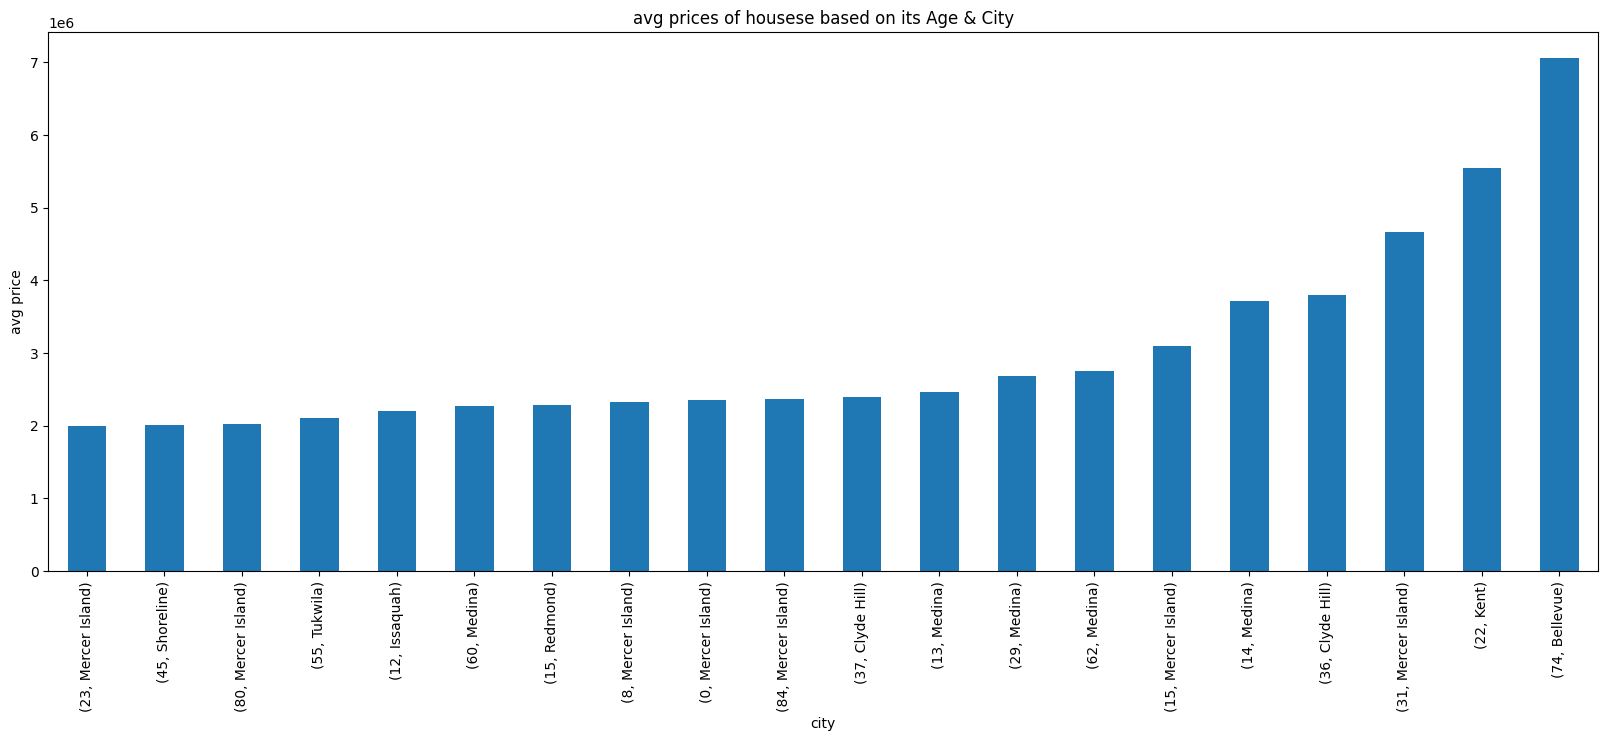

In [217]:
plt.figure(figsize=(20,7))
data.groupby(['HouseAge','city'])['price'].mean().sort_values().tail(20).plot(kind="bar")
plt.xlabel("city")
plt.ylabel("avg price")
plt.title("avg prices of housese based on its Age & City");

Numerical Data

In [218]:
NumericalFeatures=[column for column in data.columns if data[column].dtype!='O']
NumericalFeatures

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'HouseAge']

c:\Users\sures\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


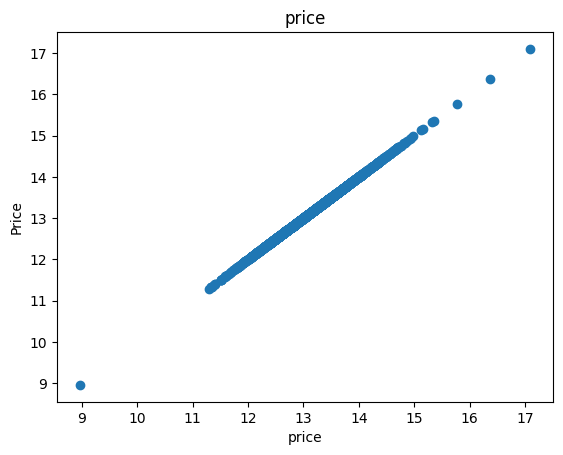

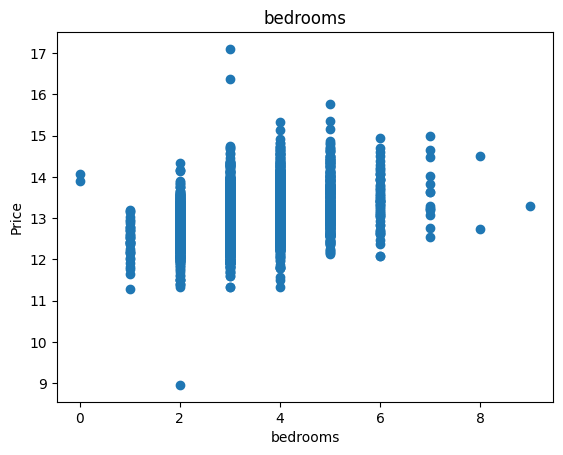

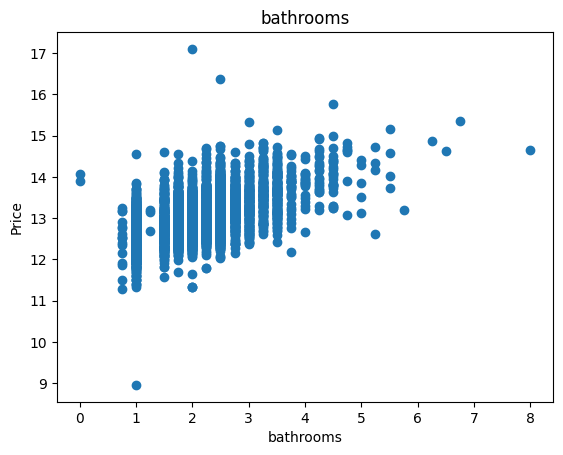

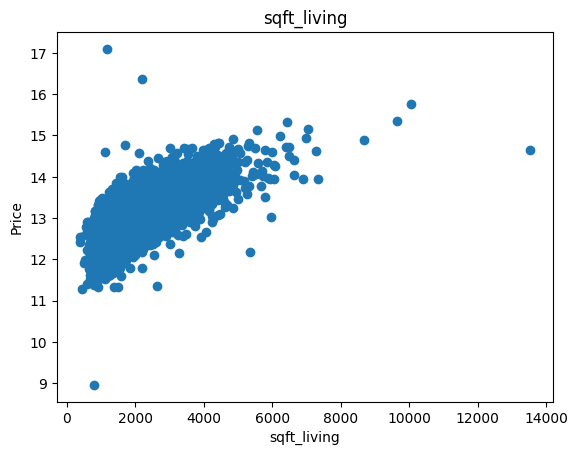

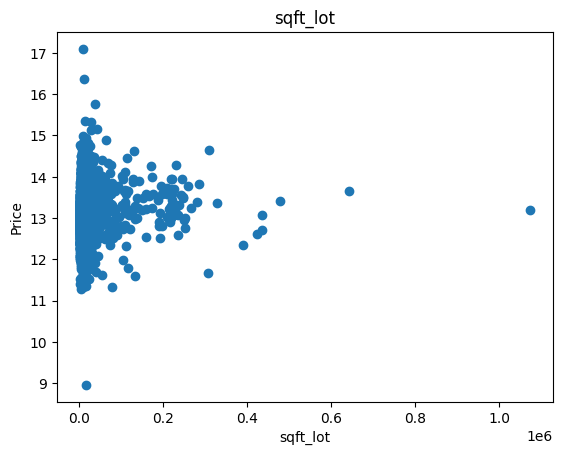

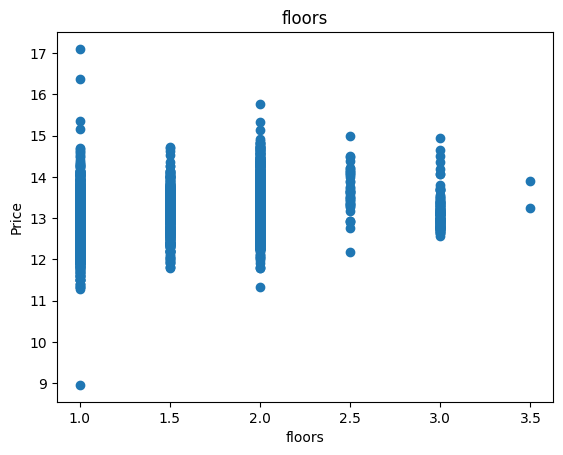

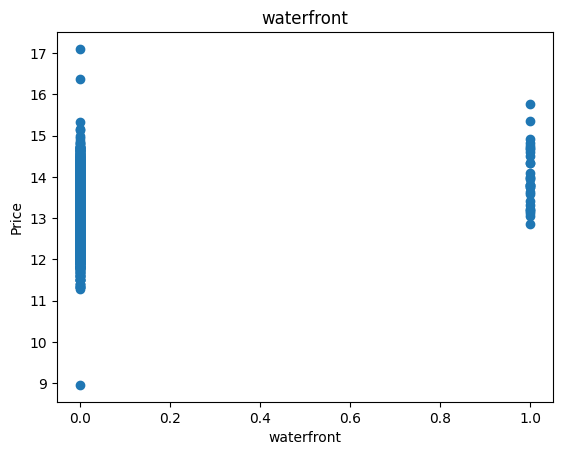

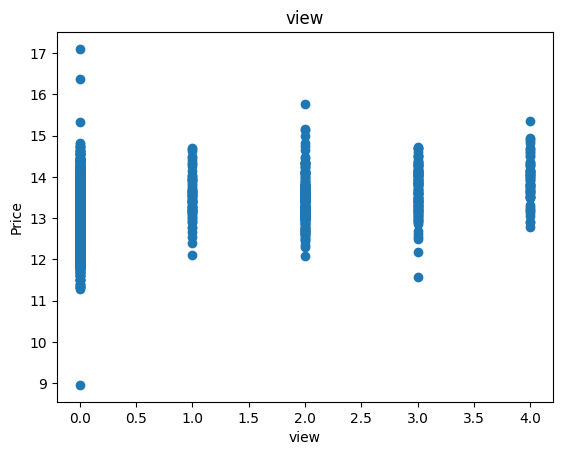

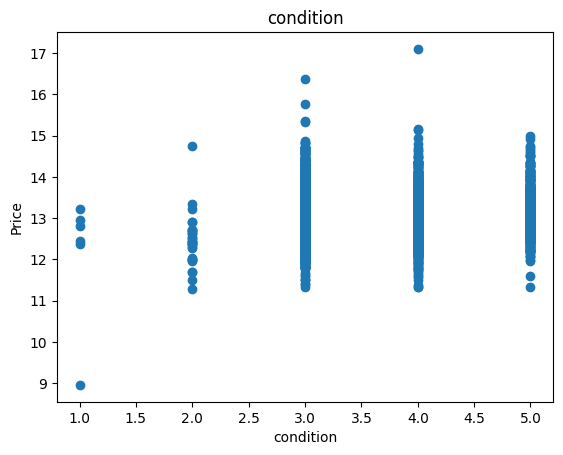

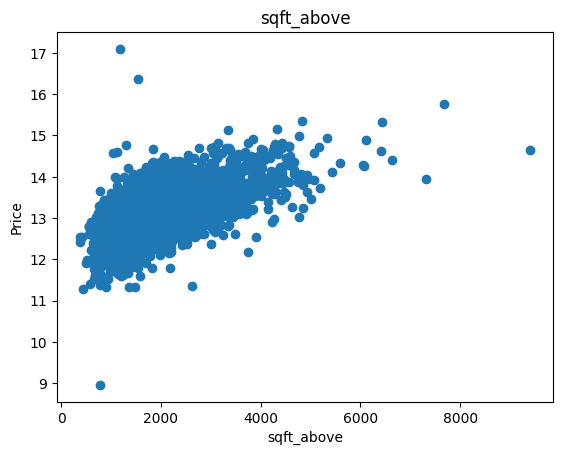

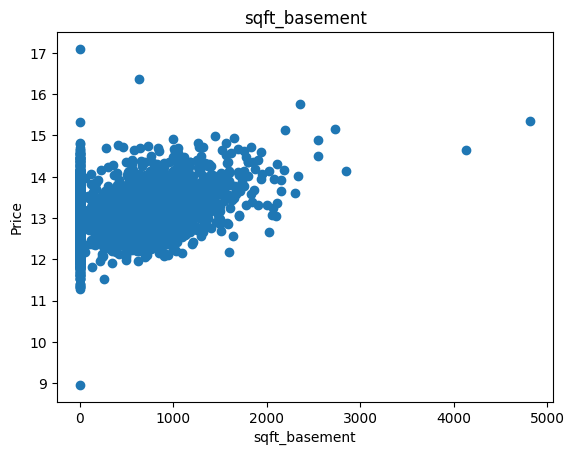

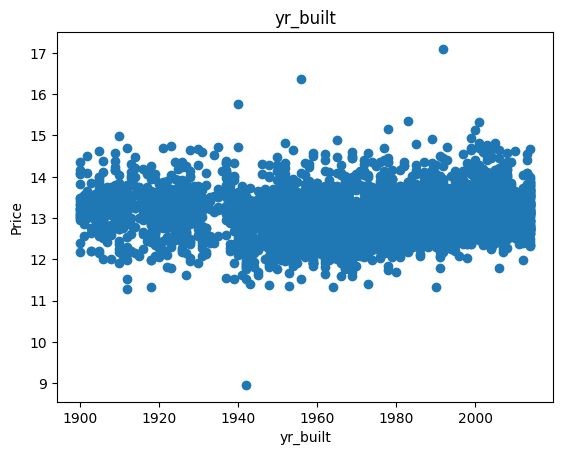

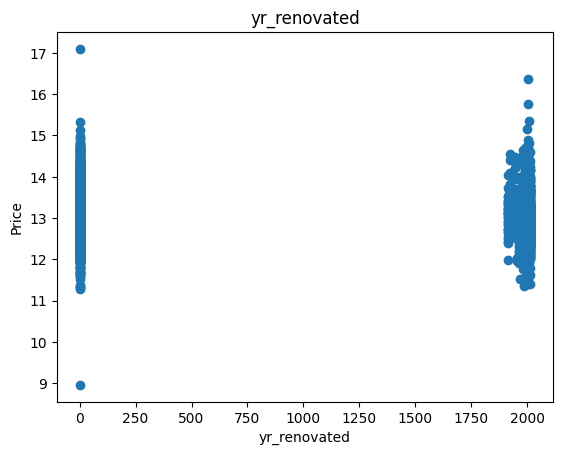

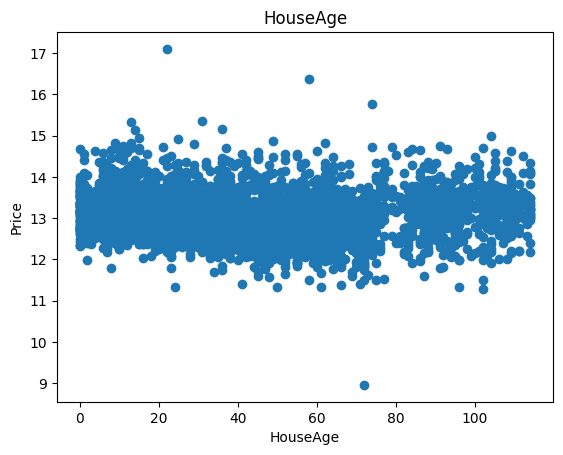

In [219]:
for feature in NumericalFeatures:
    if feature !='date':
        data2=data.copy()
        data2['price']=np.log(data2['price'])
        plt.scatter(data2[feature],data2['price'])
        plt.title(feature)
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.show()

Categorical Data

In [220]:
CategoricalFeatures=[column for column in data.columns if data[column].dtype=='O']
CategoricalFeatures

['street', 'city', 'statezip', 'country']

In [221]:
data[CategoricalFeatures]

,street,city,statezip,country
0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,709 W Blaine St,Seattle,WA 98119,USA
2,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,857 170th Pl NE,Bellevue,WA 98008,USA
4,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...
4595,501 N 143rd St,Seattle,WA 98133,USA
4596,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,5148 S Creston St,Seattle,WA 98178,USA


<Axes: xlabel='city'>

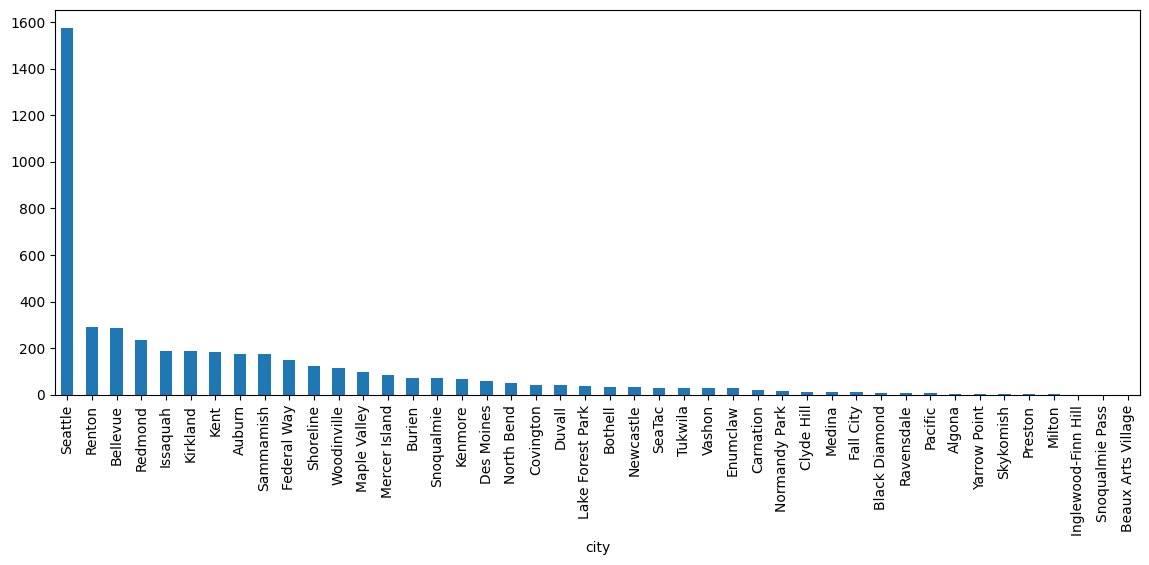

In [222]:
plt.figure(figsize=(14,5))
data['city'].value_counts().plot(kind='bar')

In [223]:
data.drop(columns=['street','statezip','country'],inplace=True)

In [224]:
data.drop(columns=['date'],inplace=True)

Finding Correlation

<Axes: >

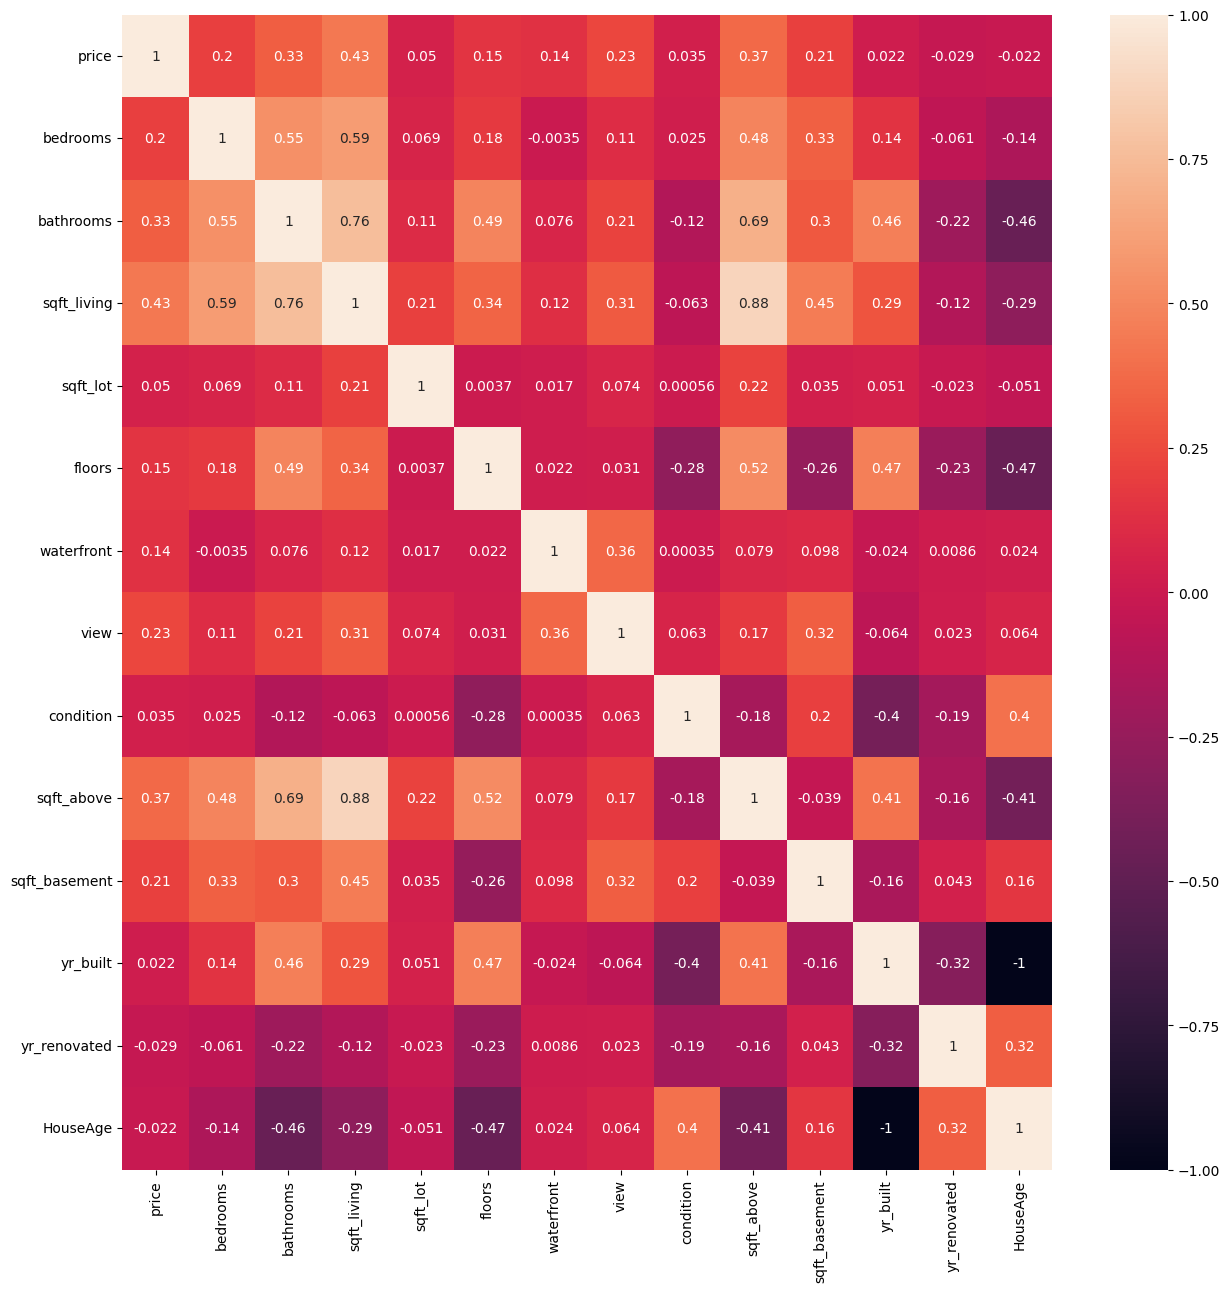

In [225]:
corrdata=data.copy()
plt.figure(figsize=(15,15))
sns.heatmap(corrdata.drop('city',axis=1).corr(),annot=True)

In [226]:
#Features with High Collinearity
def Colinearity(dataset,threshhold):
    col=set()
    corr_matrix=dataset.drop('city',axis=1).corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshhold:
                colname=corr_matrix.columns[i]
                col.add(colname)
    return col

In [227]:
Colinearity(data,0.85)

{'HouseAge', 'sqft_above'}

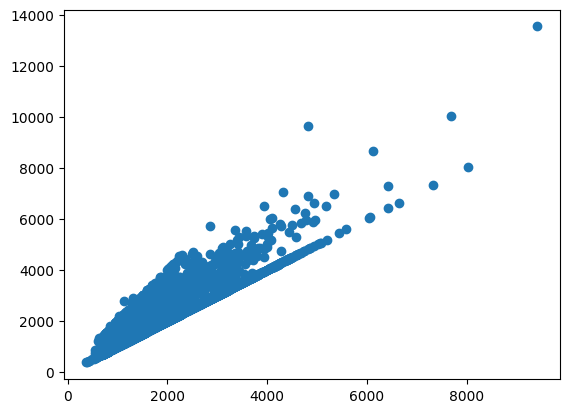

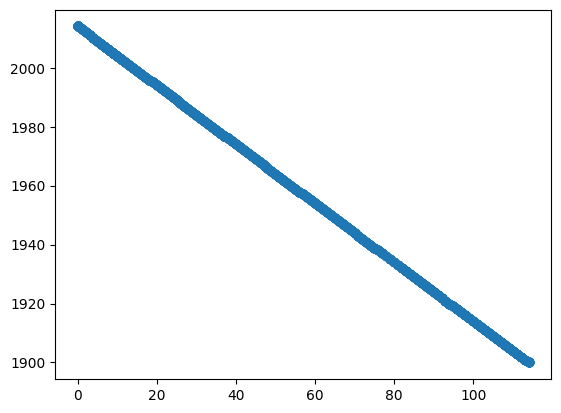

In [228]:
#These Two features has high collinearity {'HouseAge', 'sqft_above'}
plt.scatter(data['sqft_above'],data['sqft_living'])
plt.show()
plt.scatter(data['HouseAge'],data['yr_built'])

In [229]:
data.drop(['HouseAge', 'sqft_above'],axis=1,inplace=True)


In [230]:
data.drop(columns=["view"],inplace=True)

Data Transforming

In [231]:
#Transforming Categorical Data
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['city'] = label_encoder.fit_transform(data['city'])

In [232]:
x=data.drop(columns=['price'])
y=data['price']

In [233]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [234]:
#Standardizing Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
XtrainScaled = scaler.fit_transform(X_train)
XtestScaled = scaler.transform(X_test)

Model Building

Gradient Boosting Algorithm

In [280]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
GBR=GradientBoostingRegressor(loss='squared_error',learning_rate=0.1,n_estimators=200)

# Fit to training set
GBR.fit(XtrainScaled,y_train)
 
# Predict on test set
pred_y = GBR.predict(XtestScaled)
 

print('Root MSE:',np.sqrt(mean_squared_error(y_test,pred_y)))
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_y))
print('GBR Score :',GBR.score(XtestScaled,pred_y))


Root MSE: 992996.3680117325
Mean Absolute Error: 175374.9262676053
GBR Score : 1.0


Text(0.5, 1.0, 'Important Feattures')

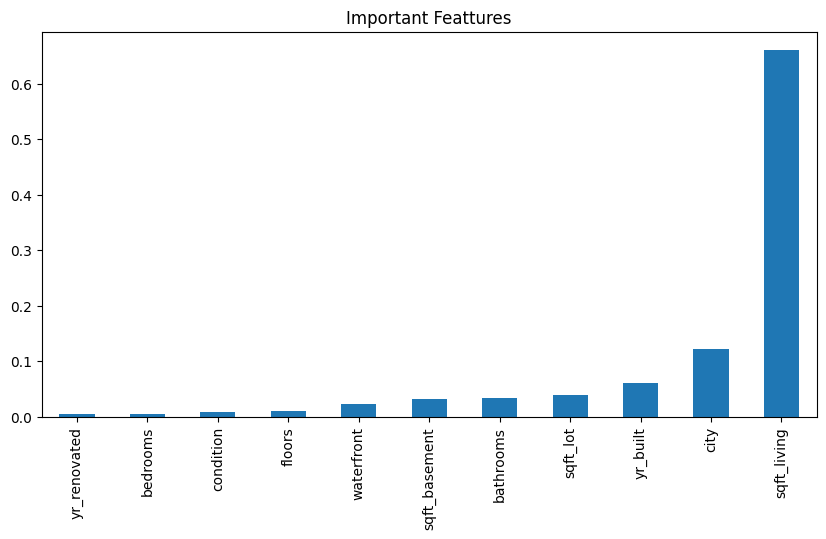

In [281]:
#Feature Importance
plt.figure(figsize=(10,5))
FeatureImportance=pd.Series(GBR.feature_importances_,index=X_train.columns).sort_values()
FeatureImportance.plot(kind='bar')
plt.title('Important Feattures')


In [290]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

modelclasses=[
    ["DecisionTree",DecisionTreeRegressor()],
    ["RandomForest",RandomForestRegressor()],
    ["LinearRegression",LinearRegression()],
]
for modelname,Model in modelclasses:        
        model=Model
        model.fit(XtrainScaled,y_train)
        ypred=model.predict(XtestScaled)
        print(f"\n--------------{modelname}----------------")
        
        print('Root MSE:',np.sqrt(mean_squared_error(y_test,pred_y)))
        print('Mean Absolute Error:',mean_absolute_error(y_test, pred_y))


--------------DecisionTree----------------
Root MSE: 992996.3680117325
Mean Absolute Error: 175374.9262676053

--------------RandomForest----------------
Root MSE: 992996.3680117325
Mean Absolute Error: 175374.9262676053

--------------LinearRegression----------------
Root MSE: 992996.3680117325
Mean Absolute Error: 175374.9262676053


@Sureshkrishna